# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
count_one = 1
set_one = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


all_data = []

print('Beginning Data Retrieval \n-----------------------------------') 

for c in cities:

   # Build query URL

     query_url = f"{url}appid={weather_api_key}&units={units}&q=" + cities[1]   

    
     try:
       print(f'Processing Record {count_one} of Set {set_one} | {city}')
       query_url = f"{url}appid={weather_api_key}&units={units}&q=" + c    
       response = requests.get(query_url).json()
       city = c
       lat = response["coord"]['lat']
       lon = response["coord"]['lon']
       temp_max = response["main"]['temp_max']
       Humidity = response["main"]['humidity']
       Cloudiness = response["clouds"]['all']
       Wind_Speed = response["wind"]['speed']
       Country = response["sys"]['country']
       Date = response["dt"]
       #print(city, lat, lon, temp, Humidity, Cloudiness,Wind_Speed,Country, Date)
       all_data.append({"City":city, "Lat": lat, "Lng": lon, "Max Temp": temp_max, "Humidity":Humidity,\
                        "Cloudiness":Cloudiness , "Wind Speed": Wind_Speed ,"Country": Country, "Date": Date})
       count_one += 1

     except:
        print("City not found. Skipping...")
        
     if count_one == 50:
        set_one += 1
        count_one = 1
        time.sleep(10)
print('-----------------------------------\nData Retrival Complete\n-----------------------------------') 

Beginning Data Retrieval 
-----------------------------------
Processing Record 1 of Set 1 | kerikeri
Processing Record 2 of Set 1 | bom jesus da lapa
Processing Record 3 of Set 1 | broome
Processing Record 4 of Set 1 | bandon
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | marat
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | quesnel
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | hawaiian paradise park
City not found. Skipping...
Processing Record 11 of Set 1 | taiohae
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | san luis de la loma
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | karratha
Processing Record 20 of Set 1 |

Processing Record 37 of Set 4 | yellowknife
Processing Record 38 of Set 4 | touros
Processing Record 39 of Set 4 | greymouth
Processing Record 40 of Set 4 | san juan
Processing Record 41 of Set 4 | darnah
Processing Record 42 of Set 4 | baardheere
Processing Record 43 of Set 4 | nagqu
City not found. Skipping...
Processing Record 43 of Set 4 | cargados carajos
Processing Record 44 of Set 4 | ntchisi
Processing Record 45 of Set 4 | choibalsan
Processing Record 46 of Set 4 | yemetsk
Processing Record 47 of Set 4 | coronel suarez
Processing Record 48 of Set 4 | brezina
Processing Record 49 of Set 4 | bhag
Processing Record 1 of Set 5 | naze
Processing Record 2 of Set 5 | puerto deseado
Processing Record 3 of Set 5 | kirakira
Processing Record 4 of Set 5 | mazagao
City not found. Skipping...
Processing Record 4 of Set 5 | fuvahmulah
Processing Record 5 of Set 5 | tynda
Processing Record 6 of Set 5 | balimila
City not found. Skipping...
Processing Record 6 of Set 5 | vingt cinq
Processing R

Processing Record 20 of Set 8 | mount gambier
Processing Record 21 of Set 8 | broken hill
Processing Record 22 of Set 8 | minas de marcona
Processing Record 23 of Set 8 | sidney
Processing Record 24 of Set 8 | salinopolis
Processing Record 25 of Set 8 | okha
Processing Record 26 of Set 8 | prince rupert
Processing Record 27 of Set 8 | turinskaya sloboda
Processing Record 28 of Set 8 | abepura
Processing Record 29 of Set 8 | mhamid
Processing Record 30 of Set 8 | oriximina
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | zapala
Processing Record 33 of Set 8 | tinajo
Processing Record 34 of Set 8 | gambiran satu
Processing Record 35 of Set 8 | manismata
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | porto novo
Processing Record 38 of Set 8 | cuneo
Processing Record 39 of Set 8 | tromso
Processing Record 40 of Set 8 | freeport
Processing Record 41 of Set 8 | agat village
Processing Record 42 of Set 8 | mhangura
Processing Record 43 of Set 8 | bar

Processing Record 8 of Set 12 | zheleznogorsk-ilimskiy
Processing Record 9 of Set 12 | san borja
Processing Record 10 of Set 12 | xinmin
Processing Record 11 of Set 12 | fuyu
Processing Record 12 of Set 12 | bluefields
Processing Record 13 of Set 12 | presidente epitacio
Processing Record 14 of Set 12 | ormara
Processing Record 15 of Set 12 | nola
Processing Record 16 of Set 12 | ghadamis
Processing Record 17 of Set 12 | oliver
Processing Record 18 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 19 of Set 12 | mata-utu
Processing Record 20 of Set 12 | camalu
Processing Record 21 of Set 12 | isangel
Processing Record 22 of Set 12 | tyukalinsk
-----------------------------------
Data Retrival Complete
-----------------------------------


In [29]:
# Convert the cities weather data into a Pandas DataFrame
weather_data_df = pd.DataFrame(all_data) 

# Show Record Count
weather_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [30]:
# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bom jesus da lapa,-13.2550,-43.4181,93.94,26,15,7.38,BR,1699733790
1,broome,42.2506,-75.8330,43.47,73,100,6.91,US,1699733790
2,bandon,51.7469,-8.7425,49.59,94,100,21.59,IE,1699733790
3,ushuaia,-54.8000,-68.3000,44.26,65,75,18.01,AR,1699733545
4,marat,25.0701,45.4615,70.57,28,7,7.72,SA,1699733791


In [31]:
# Export the City_Data into a csv
weather_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
weather_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bom jesus da lapa,-13.2550,-43.4181,93.94,26,15,7.38,BR,1699733790
1,broome,42.2506,-75.8330,43.47,73,100,6.91,US,1699733790
2,bandon,51.7469,-8.7425,49.59,94,100,21.59,IE,1699733790
3,ushuaia,-54.8000,-68.3000,44.26,65,75,18.01,AR,1699733545
4,marat,25.0701,45.4615,70.57,28,7,7.72,SA,1699733791


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

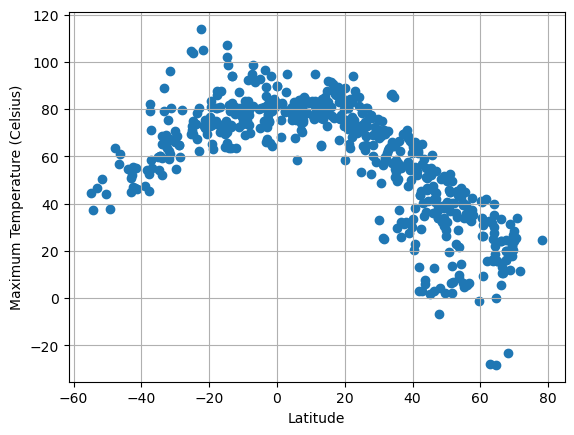

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
# plt.title("Temperature in World Cities")
plt.ylabel("Maximum Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

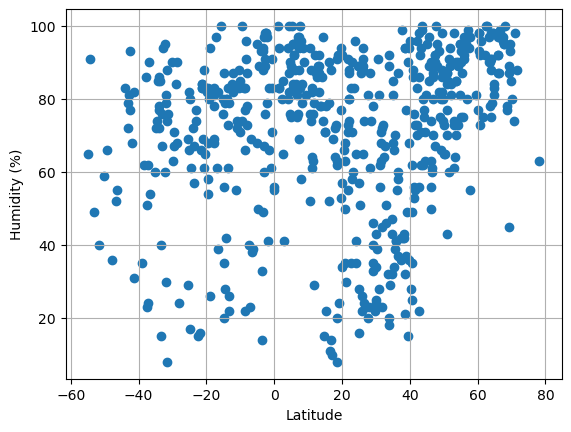

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

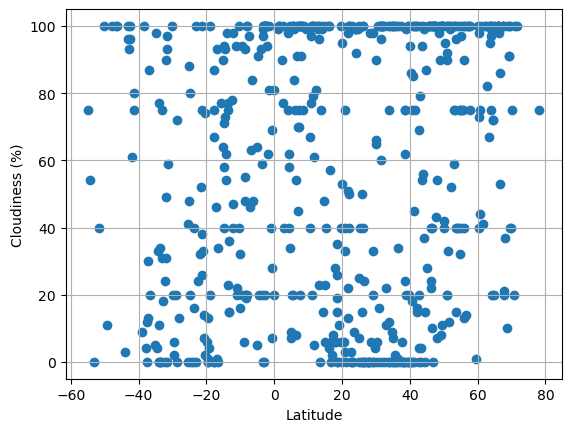

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

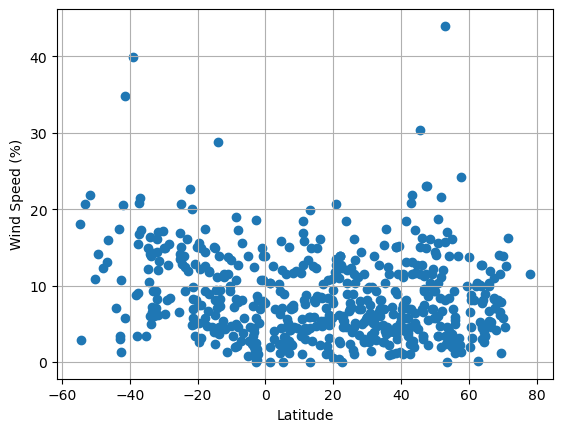

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values, xlabel, ylabel)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    return line_eq
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(weather_data_df.loc[weather_data_df["Lat"] >= 0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,broome,42.2506,-75.8330,43.47,73,100,6.91,US,1699733790
2,bandon,51.7469,-8.7425,49.59,94,100,21.59,IE,1699733790
4,marat,25.0701,45.4615,70.57,28,7,7.72,SA,1699733791
7,quesnel,52.9999,-122.5029,45.10,61,100,8.05,CA,1699733791
9,hawaiian paradise park,19.5933,-154.9731,75.87,94,100,5.75,US,1699733791


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(weather_data_df.loc[weather_data_df["Lat"] < 0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bom jesus da lapa,-13.2550,-43.4181,93.94,26,15,7.38,BR,1699733790
3,ushuaia,-54.8000,-68.3000,44.26,65,75,18.01,AR,1699733545
5,adamstown,-25.0660,-130.1015,73.04,82,48,13.44,PN,1699733791
6,edinburgh of the seven seas,-37.0676,-12.3116,58.57,90,87,21.52,SH,1699733791
8,carnarvon,-24.8667,113.6333,69.44,80,80,15.01,AU,1699733791


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7118365015838376


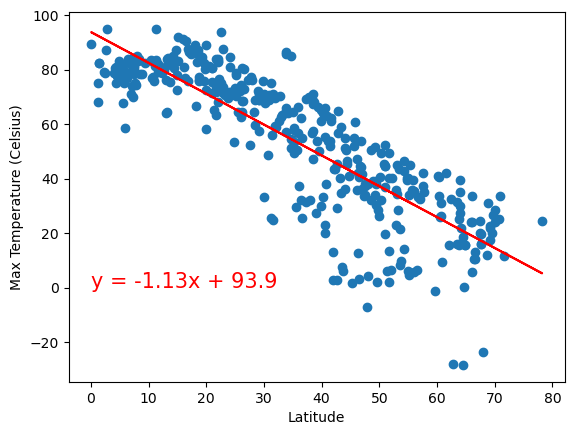

In [56]:
# Linear regression on Northern Hemisphere
equation = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 0, 0)
plt.xlabel ("Latitude")
plt.ylabel ("Max Temperature (Celsius)")
plt.show()

The r-value is: 0.4166780866434345


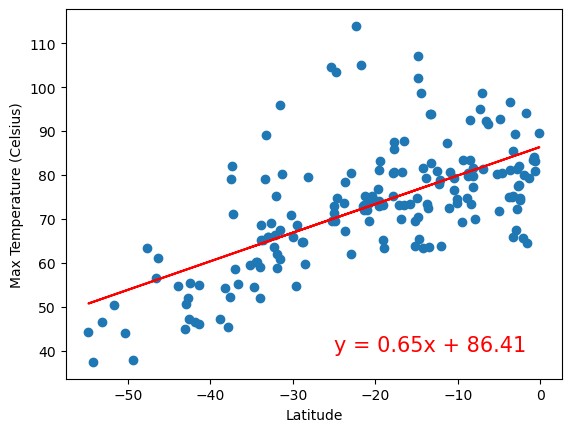

In [57]:
# Linear regression on Southern Hemisphere
equation = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, -25, 40)
plt.xlabel ("Latitude")
plt.ylabel ("Max Temperature (Celsius)")
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and maximum temperature in the northern hemisphere. There is a weak positive correlation between latitude and maximum temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03670674632917508


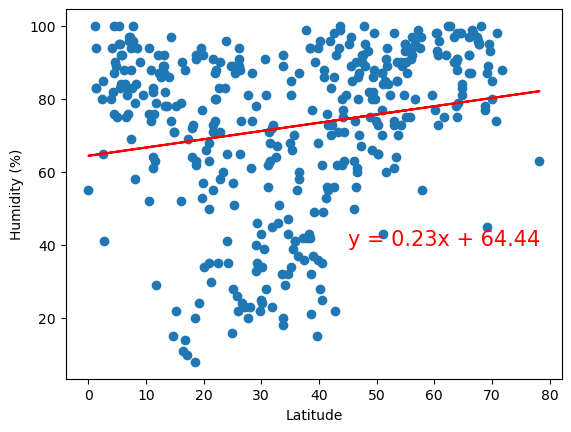

In [58]:
# Northern Hemisphere
equation = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 45, 40)
plt.xlabel ("Latitude")
plt.ylabel ("Humidity (%)")
plt.show()

The r-value is: 0.0213174014994225


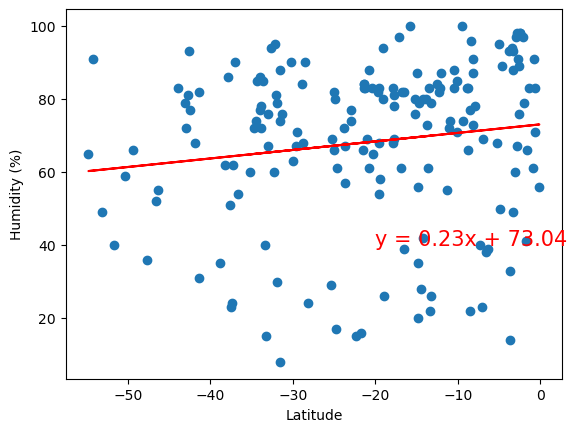

In [59]:
# Southern Hemisphere
equation = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -20, 40)
plt.xlabel ("Latitude")
plt.ylabel ("Humidity (%)")
plt.show()


**Discussion about the linear relationship:** There is a very weak correlation between latitude and humidity for both northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01348932140259924


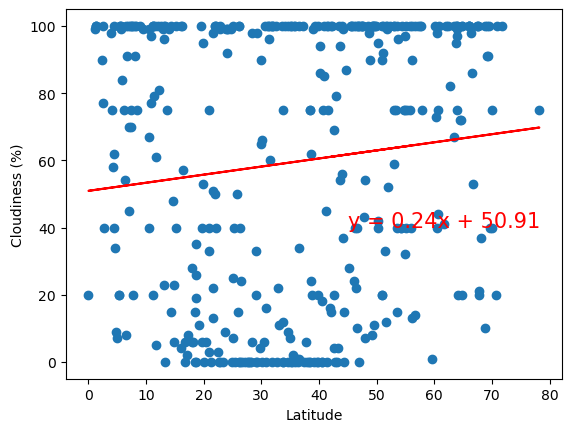

In [60]:
# Northern Hemisphere
equation = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 45, 40)
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.show()

The r-value is: 0.017445712757620337


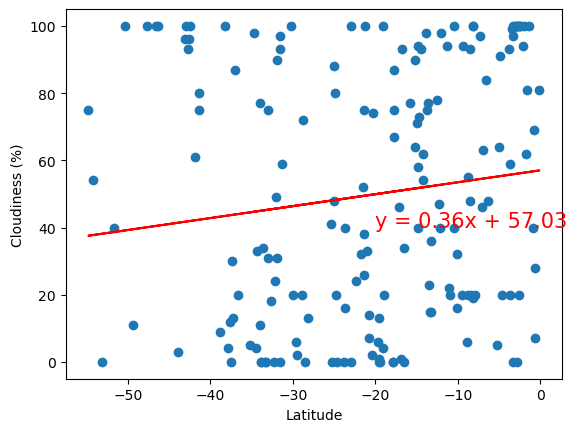

In [61]:
# Southern Hemisphere
equation = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -20, 40)
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between cloudiness and latitude in both Northern and Southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007259359022037772


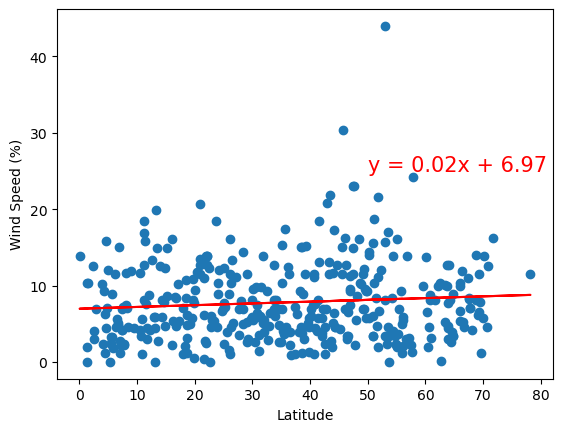

In [62]:
# Northern Hemisphere
equation = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 50, 25)
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (%)")
plt.show()

The r-value is: 0.1391110711089231


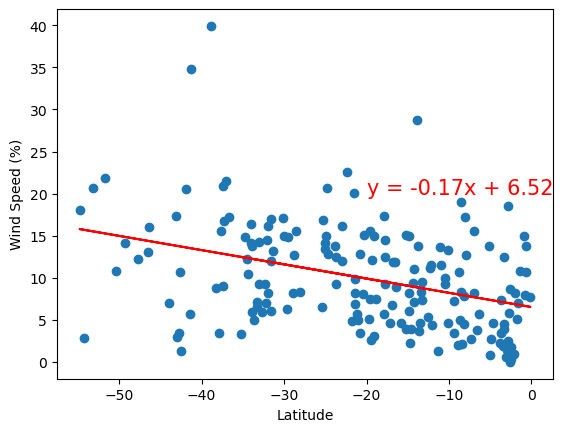

In [63]:
# Southern Hemisphere
equation = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, -20, 20)
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (%)")
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between latitude and wind speed in both northern and southern hemispheres.